## Exploring how the scypy function cross correlation works

Useful links:
    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html
    
A short explanation of cross correlation and convolution (slides)

https://users.cs.northwestern.edu/~pardo/courses/eecs352/lectures/MPM16-topic8-Convolution.pdf

In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Documentation example

In [2]:
sig = np.repeat([0., 3., 3., 0., 2., 0., 0., 1.], 128)
sig_noise = sig + np.random.randn(len(sig))
corr = signal.correlate(sig_noise, np.ones(128), mode='full') / 128
clock = np.arange(64, len(sig), 128)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


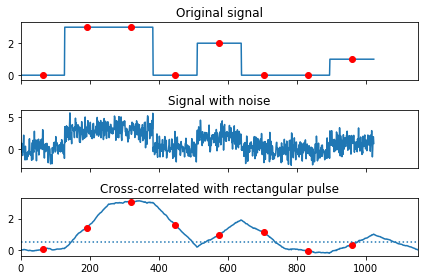

In [3]:
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
fig.show()

#### Example from ...

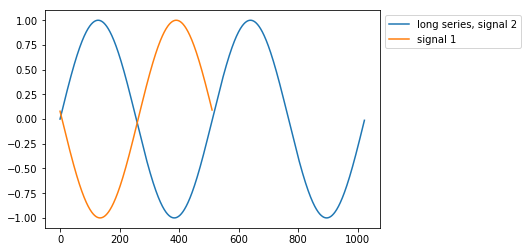

In [31]:
fig,ax = plt.subplots(1,1)
N = 1024
ix = np.arange(N)
ix2 = np.arange(int(N/2))
signal1 = np.sin(2*np.pi*ix2/float(N/2) + 512) # shorter, translated series
signal2 = np.sin(2*np.pi*ix/float(N/2))
ax.plot(signal2, label='long series, signal 2')
ax.plot(signal1, label='signal 1')
ax.legend(bbox_to_anchor=(1,1))

correlation_array = signal.correlate(signal1, signal2, mode='same')
best_shift = np.argmax(correlation_array)

The output of the corss-correlation fucntion is the same size of the smaller array.

The index of max cross-correlation is 262
The shape of the cross-correlation function output is
(512,)


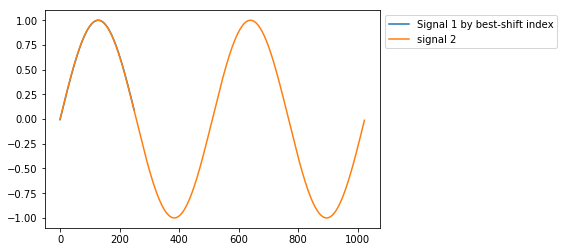

In [32]:
print('The index of max cross-correlation is %d' %best_shift)
print('The shape of the cross-correlation function output is')
print(np.shape(correlation_array))
signal3 = signal1[best_shift:]

fig,ax = plt.subplots(1,1)
ax.plot(signal3, label='Signal 1 by best-shift index')
ax.plot(signal2, label='signal 2')
ax.legend(bbox_to_anchor=(1,1))


#### Locate a pulse

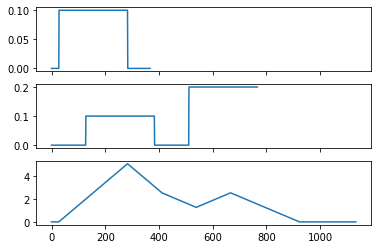

In [4]:
pulse = np.repeat([0., 0.1, 0.1, 0., 0., 0.], 128)
pulse = pulse[100:-300]
timeseries = np.repeat([0., 0.1, 0.1, 0., .2, .2], 128)

corr_array = signal.correlate(pulse, timeseries, mode='full')
best_shift = np.argmax(corr_array),

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, sharex=True)
ax0.plot(pulse)
ax1.plot(timeseries)
ax2.plot(corr_array)

In [78]:
best_shift

(0,)

In [79]:
(6*128)/2

384.0